In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report

<h1>1.Exploratory Data Analysis</h1>

In [59]:
data = pd.read_excel('CreditCardDataset.xlsx')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [60]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [61]:
data.shape

(57355, 31)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [63]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<h3>We do not have any null data </h>

<h3>Our Target variable is Class so lets see how many values it have</h3>

In [64]:
data['Class'].unique()

array([0, 1], dtype=int64)

<h3>So we have 2 values 1 for fraudulent and 0 for non-fradulent which means our job is to work on binary classification
</h3>

In [65]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0    56863
1      492
Name: count, dtype: int64


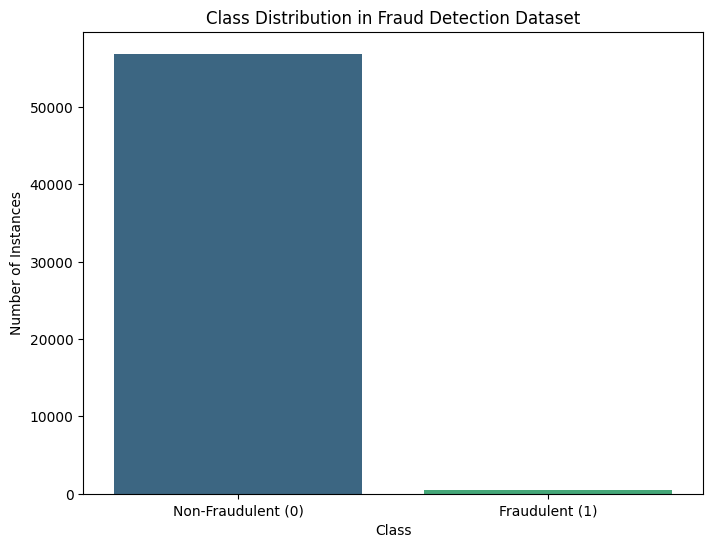

In [66]:

# Create a bar plot directly from the DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis')

# Add titles and labels
plt.title('Class Distribution in Fraud Detection Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])

# Show the plot
plt.show()

<h4>From the bar graph we can see that the number of instances with 0 is very high as compraed to 1 which with create bias towards 0 in our model.That's the reason we need to sort this first before processing furthur.</h4>

<h1>2. Handling imbalance in the dataset: 
</h1>

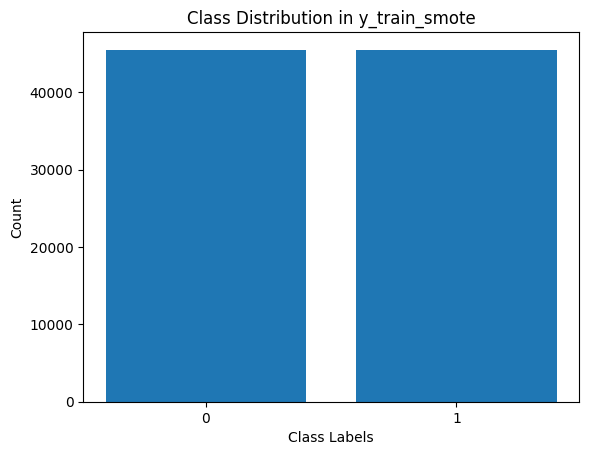

In [67]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Applying SMOTE to balance the weight of the samples
smote = SMOTE(random_state=17)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#checking if our training data is now balanced
unique, counts = np.unique(y_train_smote, return_counts=True)

plt.bar(unique, counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in y_train_smote')
plt.xticks(unique) 
plt.grid(False)
plt.show()

<h4>The training set is now balanced</h4>

<h1>3. Implementing Neural Network using PyTorch Framework
</h1>

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [69]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train_smote.values, dtype=torch.float32)  
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [70]:
#defining the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [71]:
# Initializing the model, loss function, and optimizer

model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [72]:

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training the model
epochs = 75
for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train.view(-1, 1))
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test.view(-1, 1))
        test_losses.append(test_loss.item())
        
        # Compute accuracy
        train_pred = torch.round(outputs)
        train_accuracy = accuracy_score(y_train.cpu().detach().numpy(), train_pred.cpu().detach().numpy())
        train_accuracies.append(train_accuracy)
        
        test_pred = torch.round(test_outputs)
        test_accuracy = accuracy_score(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())
        test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss.item()}, Validation Loss: {test_loss.item()}, Training Accuracy: {train_accuracy}, Validation Accuracy: {test_accuracy}')


Epoch 1/75, Training Loss: 0.6854872703552246, Validation Loss: 0.5907533764839172, Training Accuracy: 0.6334029457023521, Validation Accuracy: 0.9946822421759219
Epoch 2/75, Training Loss: 0.5884325504302979, Validation Loss: 0.513804018497467, Training Accuracy: 0.8979555946361838, Validation Accuracy: 0.9943335367448348
Epoch 3/75, Training Loss: 0.5066244006156921, Validation Loss: 0.4151740074157715, Training Accuracy: 0.9108265552868763, Validation Accuracy: 0.9944207131026066
Epoch 4/75, Training Loss: 0.4242686927318573, Validation Loss: 0.3090539872646332, Training Accuracy: 0.9114310837546714, Validation Accuracy: 0.994246360387063
Epoch 5/75, Training Loss: 0.34913039207458496, Validation Loss: 0.21291416883468628, Training Accuracy: 0.9105078039129479, Validation Accuracy: 0.9938976549559759
Epoch 6/75, Training Loss: 0.2892961800098419, Validation Loss: 0.14049187302589417, Training Accuracy: 0.9105297867663222, Validation Accuracy: 0.9938104785982042
Epoch 7/75, Training 

<h1>4. Training & Validation Accuracy plots:
</h1>

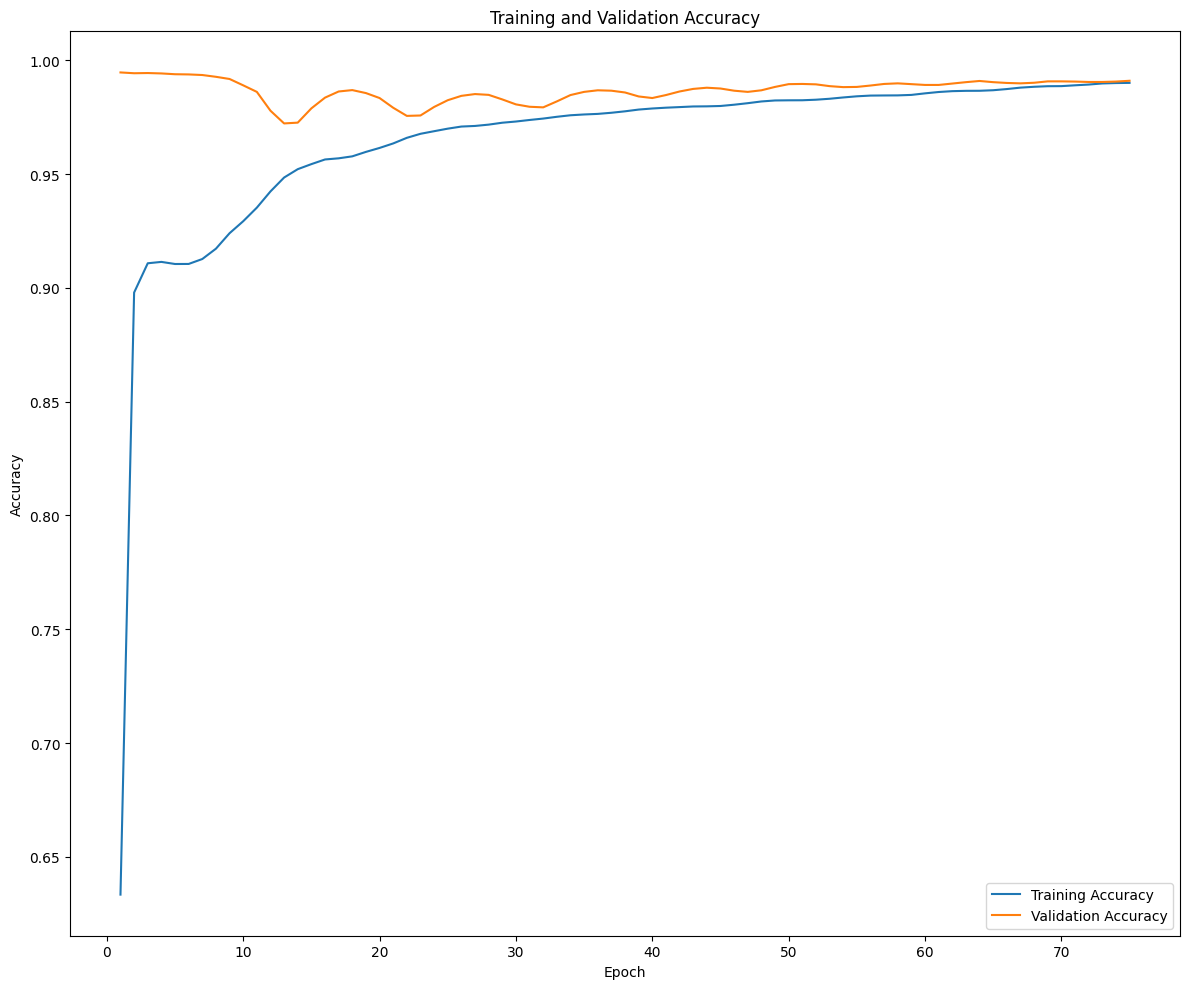

In [73]:
plt.figure(figsize=(12, 10))

# Plotting Training and Validation Accuracies
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

<h1>5. Training & Validation Loss plots: 
</h1>

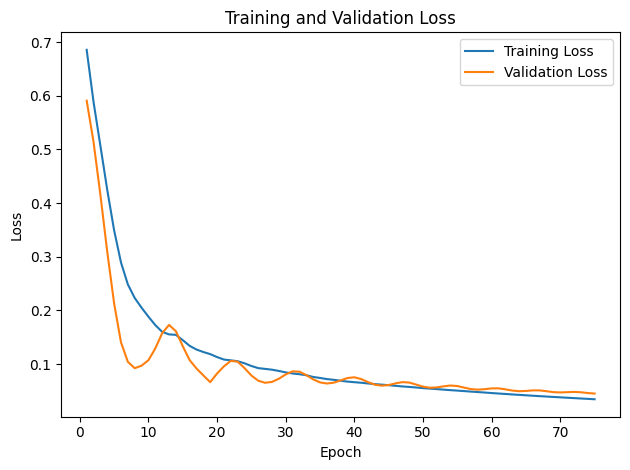

In [74]:

# Plotting Training and Validation Losses
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

<H3>bECAUSE I ADDED         self.dropout = nn.Dropout(0.2)(TO REGULARIZE THE MODEL FROM OVERFITTING) TO THE NEURAL NETWORK THE LOSS AND THE VALIDATION PLOTS SEEMS TO PERFORM BETTER
</H3>

In [76]:
print("Classification Report ::::")
print(classification_report(y_test, test_pred))

Classification Report ::::
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11373
         1.0       0.49      0.83      0.61        98

    accuracy                           0.99     11471
   macro avg       0.74      0.91      0.80     11471
weighted avg       0.99      0.99      0.99     11471



<h4>Summary:</h4>
So, we implementated the neural network using PYTorch.
And,The classification report shows how well a model performs for two classes. It accurately predicts negatives (class 0) almost all the time with high recall (99%) and precision (100%). However, for positives (class 1), it correctly identifies about half of them (precision 49%) and misses some (recall 83%). Overall, the model is very accurate (99%), but it's better at handling negatives than positives.

<h1>-----------------THANK YOU-------------------</h1>